In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/student_scores_em.csv',
                index_col='student number')

# print(df.shape)
# display(df.head(3))

scores = df['english'][:10] # 영어 성적 상단 10개만 슬라이싱

scores_df = pd.DataFrame(scores) # Series
# display(scores_df)

print(scores.mean())     # 55.0. Series의 메서드. 평균
print(np.mean(scores))   # 55.0. Numpy의 함수
print(scores_df.mean())  # 55.0. Pandas(DataFrame)의 메서드. 결과는 Series

print(np.median(scores)) # 56.5. Numpy의 함수. 중위값

print(pd.Series([1,1,1,2,2,3]).mode()) # 1. Pandas의 함수. 최빈값

55.0
55.0
english    55.0
dtype: float64
56.5
0    1
dtype: int64


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/student_scores_em.csv',
                index_col='student number')

scores = df['english'][:10]

scores_df = pd.DataFrame(scores)

deviation = scores - np.mean(scores) # 편차. Series - Scala(broadcasting). 값이 여러개라 활용하기 어려움
print(deviation)

print(deviation.mean())              # 0. 편차의 평균(합)

print(np.mean(deviation ** 2))       # 86.0. 분산, 편차의 제곱의 평균
print(np.var(deviation))             # 86.0. Numpy의 함수. 분산
print(scores_df.var())               # 95.555556. Pandas(DataFrame)의 메서드. 모든 컬럼에 대한 분산을 구함

# 왜 Numpy / Pandas의 분산 값이 다를까?
# 표본분산 : Numpy, 통상적)
# 불편분산 : Pandas, 편차의 제곱의 합을 n으로 나누는 것이 아닌 n-1로 나눔. 분모가 작아서 값이 커짐!

print(scores_df.var(ddof=0))        # 86.0. ddof=0 옵션을 줘서 표본분산을 구함

print(np.sqrt(np.var(scores)))      # 9.273618495495704. Numpy의 함수. 표준편차. 분산에 루트를 씌워서 제곱근을 구하라
print(np.std(scores))               # 9.273618495495704. Numpy의 함수. 표준편차. Series의 표준편차를 구하라

# 사분위 값을 구하는 Numpy의 함수. 사분위 범위(IQR)
Q1 = np.percentile(scores, 25) # Numpy의 함수. 1사분위(Q1, 25%)
Q2 = np.percentile(scores, 50) # 2사분위(Q2, 50%) = 중위값(median)
Q3 = np.percentile(scores, 75) # 3사분위(Q3, 75%)

IQR = Q3 - Q1
print(IQR) # 15.0. 사분위 범위(IQR)

student number
1    -13.0
2     14.0
3      1.0
4    -14.0
5      2.0
6     -7.0
7     10.0
8     -6.0
9     10.0
10     3.0
Name: english, dtype: float64
0.0
86.0
86.0
english    95.555556
dtype: float64
english    86.0
dtype: float64
9.273618495495704
9.273618495495704
15.0


In [54]:
df = pd.read_csv('./data/student_scores_em.csv',
                index_col='student number')

scores = df['english'].values # 영어성적을 가지고 ndarray 생성
print(scores)

freq, tmp = np.histogram(scores, bins=10, range=(0, 100)) # 경계값과 데이터 범위를 지정
print(tmp) # 경계값 구함
print(freq) # 각 구간에 몇 개의 데이터가 들어가 있는지(frequency, 도수)

# 단변수(1차원) 데이터의 도수분포표를 DataFrame으로 만들기
freq_class = [str(i) + '~' + str(i+10) for i in range(0, 100, 10)] # 행 index부터 만들기(list comprehension)
print(freq_class)
freq_dist_df = pd.DataFrame({'Frequency':freq}, index=freq_class)
display(freq_dist_df)

[42 69 56 41 57 48 65 49 65 58 70 47 51 64 62 70 71 68 73 37 65 65 61 52
 57 57 75 61 47 54 66 54 54 42 37 79 56 62 62 55 63 57 57 67 55 45 66 55
 64 66]
[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]
[ 0  0  0  2  8 16 18  6  0  0]


,Frequency
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0
90~100,0


In [64]:
df = pd.read_csv('./data/student_scores_em.csv',
                index_col='student number')

scores = df['english'].values
# print(scores)

freq, tmp = np.histogram(scores, bins=10, range=(0, 100))

# 도수분포표
freq_class = [str(i) + '~' + str(i+10) for i in range(0, 100, 10)]

freq_dist_df = pd.DataFrame({'Frequency':freq}, index=freq_class)

# class mark(계급값). class(구간)를 값으로 표현
class_mark = [(i + (i+10)) / 2 for i in range(0,100,10)]
freq_dist_df['class_mark'] = class_mark

# relative frequensy(상대도수). 전체 데이터에 대해 해당 class의 도수가 얼마 만큼의 비율을 차지하고 있는지
rel_freq = freq / freq.sum()
freq_dist_df['rel_freq'] = rel_freq

# cumulative relative frequency(누적 상대도수). 해당 class까지 상대도수의 누적
# print(rel_freq)
# print(np.cumsum(rel_freq)) # Numpy의 함수. 누적 상대도수
freq_dist_df['cum_rel_freq'] = np.cumsum(rel_freq)

display(freq_dist_df)

,Frequency,class_mark,rel_freq,cum_rel_freq
0~10,0,5.0,0.00,0.00
10~20,0,15.0,0.00,0.00
20~30,0,25.0,0.00,0.00
30~40,2,35.0,0.04,0.04
40~50,8,45.0,0.16,0.20
50~60,16,55.0,0.32,0.52
60~70,18,65.0,0.36,0.88
70~80,6,75.0,0.12,1.00
80~90,0,85.0,0.00,1.00
90~100,0,95.0,0.00,1.00


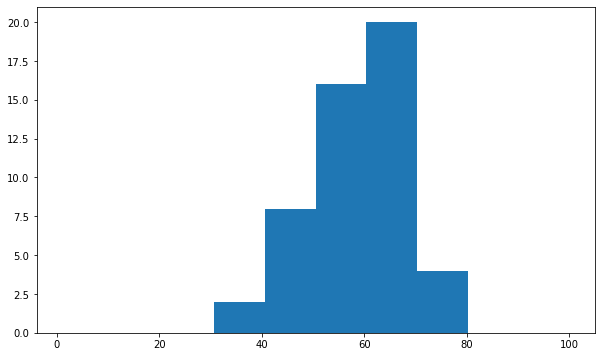

In [75]:
# Histogram
import matplotlib.pyplot as plt

df = pd.read_csv('./data/student_scores_em.csv',
                index_col='student number')

scores = df['english'].values

figure = plt.figure(figsize=(10,6))
ax = figure.add_subplot(1,1,1)

ax.hist(scores, bins=10, range=(1,100))
plt.show()

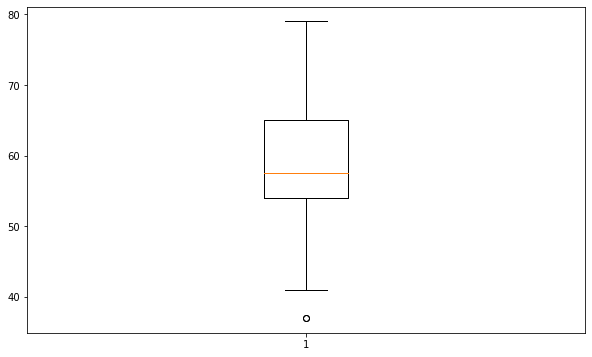

In [90]:
import matplotlib.pyplot as plt

df = pd.read_csv('./data/student_scores_em.csv',
                index_col='student number')

scores = df['english'].values

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)

ax.boxplot(scores)
plt.show()

# display(df.sort_values(by='english', ascending=True))

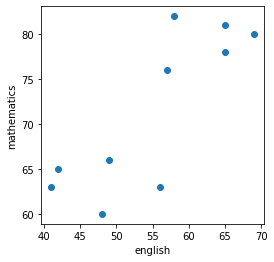

55.0 71.4


In [101]:
# 2차원 데이터의 수치지표과 시작적 표현
df = pd.read_csv('./data/student_scores_em.csv',
                index_col='student number')

en_scores = df['english'][:10]
ma_scores = df['mathematics'][:10]
scores_df = pd.DataFrame({'english': en_scores.values,
                         'mathematics': ma_scores.values},
                        index=['A', 'B', 'C', 'D', 'E', 'F', 'G','H', 'I', 'J'])
# display(scores_df)
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)

ax.scatter(en_scores,ma_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
plt.show()

print(en_scores.mean(), ma_scores.mean()) # 55.0 71.4